In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma

# with xenon (not frozen out)
V_xe = np.array([5.01, 4.50, 4.00, 3.50, 3.00, 2.50, 2.00, 1.75, 1.50, 1.25, 1.00, 0.75, 0.50, 0.25, 0.00]) # V
I_xe = np.array([6.2, 5.1, 7.7, 10.9, 10.6, 13.7, 20.8, 24.75, 31.85, 33.15, 25.1, 3.7, 0.05, 0.009, 0.009]) # nA (magnitude)
unc_xe = np.array([0.1, 0.5, 0.2, 0.1, 0.5, 0.2, 0.8, 2.25, 1.5, 4.85, 1.9, 0.2, 0.01, 0.002, 0.002])
for i in range(7):
    unc_xe[i] = unc_xe[i]+1
for i in range(1):
    unc_xe[i+11] = unc_xe[i+11]+1
    
print(unc_xe)


# xenon frozen out
V_fro = np.array([5.00, 4.50, 4.00, 3.50, 3.00, 2.50, 2.00, 1.75, 1.50, 1.25, 1.00, 0.75, 0.50, 0.25, 0.00]) # V
I_fro = np.array([83.1, 86.2, 79.4, 66.5, 65.6, 53.2, 45.0, 36.9, 27.2, 15.1, 4.7, 0.29, 1.40, 0.1, 0.008]) # nA (magnitude)
unc_fro = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.01, 0.01, 0.003])
unc_fro_new = unc_fro + 3

# fit a line to the frozen data

# do some sort of fit??
# before the knee, so 
def lines(data, *p):
    m1, b1, m2, b2 = p
    one = m1*data+b1
    two = m2*data+b2
    return np.maximum(one, two)


def thermcurve(data, *p):
    c1, c2, c3 = p
    therm = c1*np.exp(-(c2-data)/c3)
    return np.maximum(0, therm)

def chi_squared(x, fit, sig):
     return np.sum(np.square(x-fit)/np.square(sig))

def csprob(cs, df): # chi2 probability a function of chi2 and DOF
    prob = (np.power(cs, df/2-1)*np.exp(-cs/2))/(np.power(2, df/2)*gamma(df/2))
    return prob


voltages = V_fro
currents = I_fro
uncerts = unc_fro

# p0 is the initial guess for the fitting coefficients 
p0 = [1, 1, 1]
popt, pcov = curve_fit(thermcurve, voltages, currents, p0=p0, sigma=uncerts)
print(popt)
log_volts = np.linspace(np.min(voltages), np.max(voltages), 50)
log_corrected_fit = thermcurve(log_volts, *popt)

# find chi-squared

# intercept = (popt[3]-popt[1])/(popt[0]-popt[2])
# print(intercept)
# find bounds on the intercepts 
mu1_change = .35
b1_change=-1


#find chi squareds
orig_chi_1 = chi_squared(currents, thermcurve(voltages, *popt), uncerts)
up_chi_m1 = chi_squared(currents, thermcurve(voltages, *popt[:1], popt[1] + mu1_change, popt[2]), uncerts)
down_chi_m1 = chi_squared(currents, thermcurve(voltages, *popt[:1], popt[1] - mu1_change, popt[2]), uncerts)
#print('M1 Chi Squared(Up): {:.2f}, Difference:{}'.format(up_chi, up_chi-orig_chi))
#print('Reduced Chi Squared(Down): {:.2f}, Differnece: {}'.format(down_chi, down_chi-orig_chi))
print('M1 Average Difference: {}\n'.format((up_chi_m1+down_chi_m1-2*orig_chi_1)/2))
                                          
up_chi_b1 = chi_squared(currents, thermcurve(voltages, *popt[:2], popt[2] + b1_change), uncerts)
down_chi_b1 = chi_squared(currents, thermcurve(voltages, *popt[:2], popt[2] - b1_change), uncerts)
print('B1 Average Difference: {}\n'.format((up_chi_b1+down_chi_b1-2*orig_chi_1)/2))

print('Chi: ' + str(orig_chi_1))
print('dof: '  +str(len(voltages)-len(popt)))
print('Reduced Chi: ' + str(orig_chi_1/(len(voltages)-len(popt))))

# find intercept changes
# dint_1 = max(abs((popt[2]+b1_change-popt[1])/(popt[0]-popt[2]-mu1_change) - intercept), abs((popt[3]-popt[1]-b1_change)/(popt[0]-popt[2]+mu1_change) -intercept))

[1.10e+00 1.50e+00 1.20e+00 1.10e+00 1.50e+00 1.20e+00 1.80e+00 2.25e+00
 1.50e+00 4.85e+00 1.90e+00 1.20e+00 1.00e-02 2.00e-03 2.00e-03]
[2.32799963 1.31906564 0.94143901]
M1 Average Difference: 84921.45047629683

B1 Average Difference: 1.1049933982763398e+25

Chi: 366301.9500025979
dof: 12
Reduced Chi: 30525.16250021649


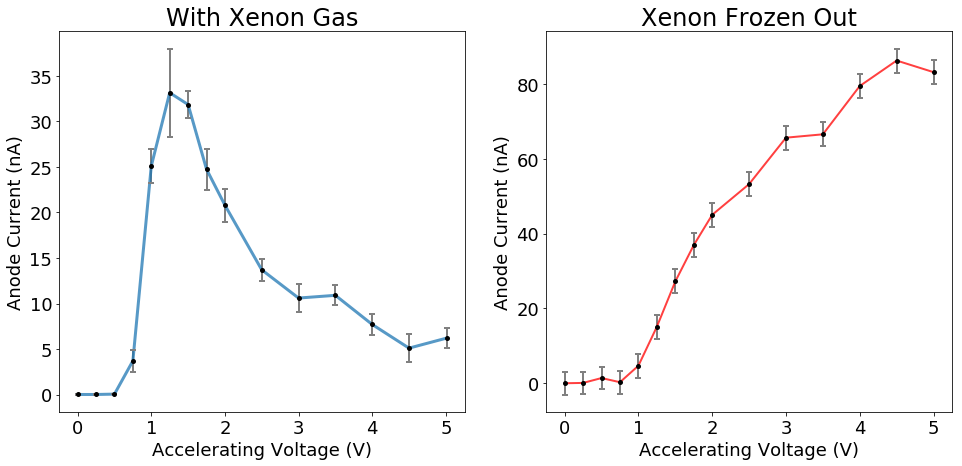

In [46]:
rt_raw_fig, rt_raw_axes = plt.subplots(1, 2, figsize=(16,7))

# w/ xenon
rt_raw_axes[0].plot(V_xe, I_xe, linewidth = 3, alpha=0.75)
rt_raw_axes[0].errorbar(V_xe, I_xe, unc_xe, fmt='.', c='black', ecolor='gray', capsize=3, elinewidth=2, markeredgewidth=2)
rt_raw_axes[0].set_xlabel('Accelerating Voltage (V)')
rt_raw_axes[0].set_ylabel('Anode Current (nA)')
rt_raw_axes[0].set_title('With Xenon Gas')

# xe frozen out
rt_raw_axes[1].plot(V_fro, I_fro, linewidth = 2, color='red', alpha=0.75)
rt_raw_axes[1].errorbar(V_fro, I_fro, unc_fro_new, fmt='.', c='black', ecolor='gray', capsize=3, elinewidth=2, markeredgewidth=2)
rt_raw_axes[1].set_xlabel('Accelerating Voltage (V)')
rt_raw_axes[1].set_ylabel('Anode Current (nA)')
rt_raw_axes[1].set_title('Xenon Frozen Out')

for i in range(2):
    for item in ([rt_raw_axes[i].xaxis.label, rt_raw_axes[i].yaxis.label]+rt_raw_axes[i].get_xticklabels()+rt_raw_axes[i].get_yticklabels()):
        item.set_fontsize(18)
    rt_raw_axes[i].title.set_fontsize(24)

chi2p = csprob(orig_chi_1, len(voltages)-len(popt))
    
# plot the fit
#log_fit_label = 'Fit: \n    I = max(0, {:1.2f}$e^{-({:1.2f}-V)/{:1.2f})$)'.format(*popt) 
#log_fit_label  = log_fit_label + '\n    $\chi ^2$: {:.1f}, dof: {}, p: {:.2f}'.format(orig_chi_1, len(voltages)-len(popt), chi2p)
#rt_raw_axes[1].plot(log_volts, log_corrected_fit, 'black', label=log_fit_label)

plt.show()

[13.40322581 16.90196078 10.31168831  6.10091743  6.18867925  3.88321168
  2.16346154  1.49090909  0.85400314  0.45550528  0.187251    0.07837838
 28.         11.11111111  0.88888889] [ 2.59549541  2.82742964  2.33327804  1.80843916  1.82272169  1.35666256
  0.7717095   0.39938606 -0.15782041 -0.78634797 -1.67530534 -2.54620718
  3.33220451  2.40794561 -0.11778304]
[0.17743568 0.2941268  0.15586451 0.10096224 0.14154227 0.08767188
 0.08665252 0.09107052 0.0476663  0.14690299 0.08683802 0.47338392
 0.20012751 0.24368569 0.43589875]


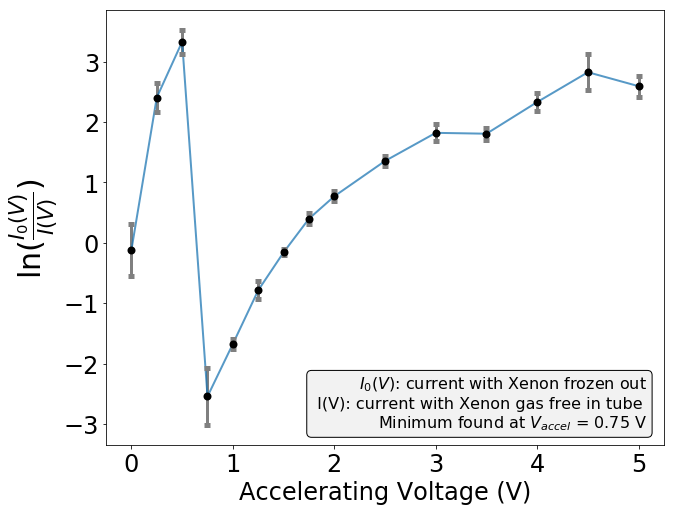

In [50]:
rt_ratio_fig, rt_ratio_ax = plt.subplots(figsize=(10,8))

I_r = I_fro/I_xe
logI_r = np.log(I_r)
print(I_r, logI_r)


def logunc(i):
    sigsq = unc_fro[i]**2/I_fro[i]**2+unc_xe[i]**2/I_xe[i]**2
    sig = np.sqrt(sigsq)
    return sig

unc_r = np.empty(len(I_r))
for i in range(len(I_r)):
    unc_r[i] = logunc(i)
print(unc_r)


rt_ratio_ax.plot(V_fro, logI_r, linewidth=2, alpha=0.75)
rt_ratio_ax.errorbar(V_fro, logI_r, unc_r, fmt='.', c='black', ecolor='gray', capsize=3, elinewidth=3, markeredgewidth=5)
rt_ratio_ax.set_xlabel('Accelerating Voltage (V)')
rt_ratio_ax.set_ylabel(r'ln($\frac{I_0(V)}{I(V)}$)')
# rt_ratio_ax.set_title('Scattering Cross Section of Electrons by Xenon Atoms')
for item in ([rt_ratio_ax.xaxis.label, rt_ratio_ax.yaxis.label]+rt_ratio_ax.get_xticklabels()+rt_ratio_ax.get_yticklabels()):
        item.set_fontsize(24)
rt_ratio_ax.yaxis.label.set_fontsize(30)
rt_ratio_ax.title.set_fontsize(24)

bbox = dict(boxstyle='round', fc='0.95')
rt_ratio_ax.annotate('$I_0(V)$: current with Xenon frozen out \n I(V): current with Xenon gas free in tube \n Minimum found at $V_{accel}$ = 0.75 V', xy=(0.97, 0.16), xycoords='axes fraction', size=16, ha='right', va='top', bbox=bbox)


plt.show()

In [51]:
unc_perc = np.array(unc_fro/I_fro*100)
print(unc_perc)
print(pd.DataFrame(I_fro, unc_fro))

[ 0.24067389  0.23201856  0.25188917  0.30075188  0.30487805  0.37593985
  0.44444444  0.54200542  0.73529412  1.32450331  4.25531915 34.48275862
  0.71428571 10.         37.5       ]
            0
0.200  83.100
0.200  86.200
0.200  79.400
0.200  66.500
0.200  65.600
0.200  53.200
0.200  45.000
0.200  36.900
0.200  27.200
0.200  15.100
0.200   4.700
0.100   0.290
0.010   1.400
0.010   0.100
0.003   0.008
